In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a s

#https://keras.io/examples/cifar10_cnn/

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1546s 9us/step


In [3]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
from keras.preprocessing import image

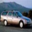

In [9]:
img=x_train[4]
img = img.reshape(32,32,3)

image.array_to_img(img,data_format='channels_last')

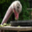

In [10]:
img=x_train[400]
img = img.reshape(32,32,3)

image.array_to_img(img,data_format='channels_last')

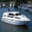

In [13]:
img=x_train[40008]
img = img.reshape(32,32,3)

image.array_to_img(img,data_format='channels_last')

In [ ]:
#The label classes in the dataset are:

#airplane 
#automobile 
#bird 
#cat 
#deer 
#dog 
#frog 
#horse 
#ship 
#truck



In [18]:
(x_train, y_train), (x_test, y_test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
from keras import backend as k
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
import keras
import os

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [26]:
x_train /= 255
x_test /=255

import keras.utils as utils

In [27]:
num_classes = 10
y_train = utils.to_categorical(y_train,num_classes)
y_test =  utils.to_categorical(y_test,num_classes)

In [46]:
batch_size=120
row=32
col=32
depth=3
input_shape=(32,32,3)
epochs=12

model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics = ['acc'])

In [47]:
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 143s 3ms/step - loss: 2.1618 - acc: 0.1995 - val_loss: 1.8793 - val_acc: 0.3453
Epoch 2/12
50000/50000 [==============================] - 147s 3ms/step - loss: 1.8324 - acc: 0.3474 - val_loss: 1.8386 - val_acc: 0.3528
Epoch 3/12
50000/50000 [==============================] - 155s 3ms/step - loss: 1.7066 - acc: 0.3921 - val_loss: 1.5952 - val_acc: 0.4342
Epoch 4/12
50000/50000 [==============================] - 147s 3ms/step - loss: 1.6403 - acc: 0.4136 - val_loss: 1.5662 - val_acc: 0.4430
Epoch 5/12
50000/50000 [==============================] - 158s 3ms/step - loss: 1.5896 - acc: 0.4346 - val_loss: 1.4875 - val_acc: 0.4695
Epoch 6/12
50000/50000 [==============================] - 180s 4ms/step - loss: 1.5510 - acc: 0.4465 - val_loss: 1.4633 - val_acc: 0.4795
Epoch 7/12
50000/50000 [==============================] - 170s 3ms/step - loss: 1.5183 - acc: 0.4600 - val_loss: 1.5059 - 

In [49]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 6s 591us/step
Test loss: 1.3098700218200683
Test accuracy: 0.5371
